# Birthday problem

How many people in a room so that at least two of them share the same birthday?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from matplotlib import pyplot as plt
from joblib import Parallel, delayed
from tqdm import tqdm

%matplotlib inline

# one time simulation

In [2]:
N = 20
simulations = np.random.randint(low = 1, high = 356, size = (int(1e4),20),)
counter = [len(set(item)) != len(item) for item in simulations]

In [3]:
np.mean(counter)

0.4173

# make it a function

In [4]:
def simulation(n_people:int,n_sim:int) -> float:
    simulations = np.random.randint(low = 1, high = 356, size = (int(n_sim),n_people),)
    counter = [len(set(item)) != len(item) for item in simulations]
    return np.mean(counter)

In [11]:
n_simulations = int(1e2)
n_people = np.arange(2,100 + 1,)
df = []
for n_p in tqdm(n_people):
    res = Parallel(n_jobs = -1,verbose = 0)(delayed(simulation)(**{'n_people':n_p,'n_sim':int(1e4)}) for _ in range(n_simulations))
    df_temp = pd.DataFrame(np.array(res).reshape(-1,1),columns = ['proportion'])
    df_temp['people'] = n_p
    df.append(df_temp)
df = pd.concat(df)

100%|███████████████████████████████████████████| 99/99 [02:59<00:00,  1.81s/it]


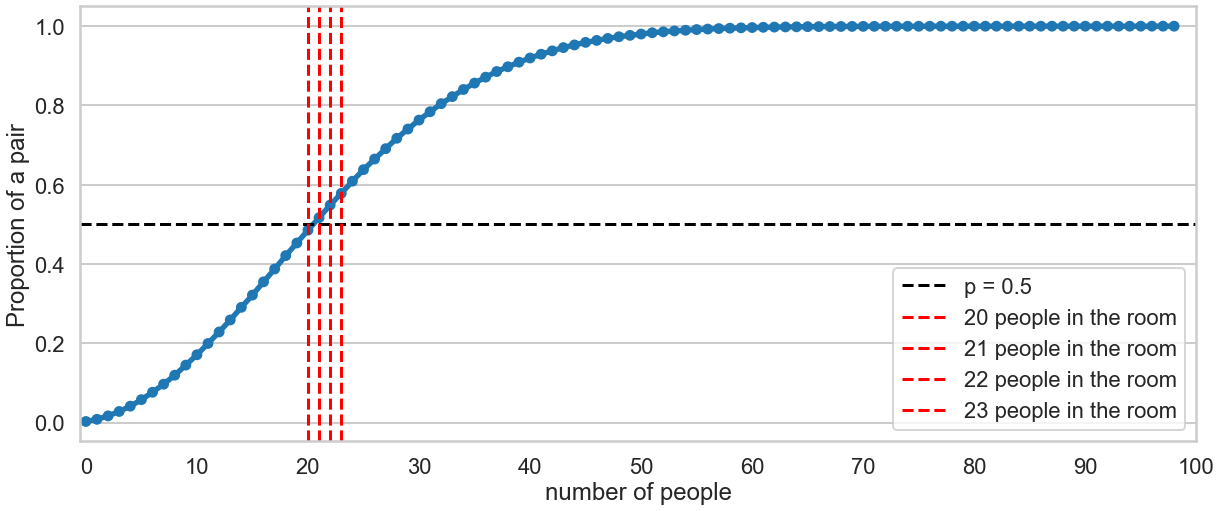

In [21]:
fig,ax = plt.subplots(figsize = (20,8))
ax = sns.pointplot(x = 'people',y = 'proportion',data = df,
                   capsize = .1,seed = 12345,
                   markers = '.',
                   ax = ax)
_ = ax.set(xlabel = 'number of people', ylabel = 'Proportion of a pair',
           xticks = np.arange(100 + 1,step = 10),
           xticklabels = np.arange(100 + 1,step = 10),)
ax.axhline(0.5,linestyle = '--',color = 'black',label = 'p = 0.5')
for k in [20,21,22,23]:
    ax.axvline(k,linestyle = '--',color = 'red',label = f'{k} people in the room')
ax.legend(loc = 'best')

In [23]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2020/04/GraphBirthdayProbabilities2.png?w=568&ssl=1")

In [13]:
df.groupby(['people']).describe()

proportion                                                         \
            count      mean       std     min       25%      50%     75%   
people                                                                     
2           100.0  0.002842  0.000506  0.0014  0.002500  0.00280  0.0032   
3           100.0  0.008381  0.000822  0.0064  0.007775  0.00845  0.0090   
4           100.0  0.016966  0.001367  0.0133  0.016075  0.01680  0.0180   
5           100.0  0.028131  0.001706  0.0240  0.027000  0.02820  0.0293   
6           100.0  0.041542  0.002058  0.0357  0.040000  0.04155  0.0430   
...           ...       ...       ...     ...       ...      ...     ...   
96          100.0  1.000000  0.000000  1.0000  1.000000  1.00000  1.0000   
97          100.0  0.999999  0.000010  0.9999  1.000000  1.00000  1.0000   
98          100.0  1.000000  0.000000  1.0000  1.000000  1.00000  1.0000   
99          100.0  1.000000  0.000000  1.0000  1.000000  1.00000  1.0000   
100         100.0  1.000000  0.000000  1.0000  1.000000  1.00000  1.0000   

                
           max  
people          
2       0.0045  
3       0.0102  
4       0.0204  
5       0.0332  
6       0.0485  
...        ...  
96      1.0000  
97      1.0000  
98      1.0000  
99      1.0000  
100     1.0000  

[99 rows x 8 columns]

This simulation overcalculate the proportions, and I don't know why. 